In [ ]:
!pip install transformers

In [ ]:
!pip install datasets

In [3]:
import torch
from transformers import LongformerTokenizer, LongformerForSequenceClassification
import datasets
import pyarrow

In [4]:
import numpy as np
import pandas as pd

#Dataset exploration

In [5]:
dataset = datasets.load_dataset("health_fact")

Using custom data configuration default


Generating train split:   0%|          | 0/9832 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1235 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1225 [00:00<?, ? examples/s]

Dataset health_fact downloaded and prepared to /root/.cache/huggingface/datasets/health_fact/default/1.1.0/99503637e4255bd805f84d57031c18fe4dd88298f00299d56c94fc59ed68ec19. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['claim_id', 'claim', 'date_published', 'explanation', 'fact_checkers', 'main_text', 'sources', 'label', 'subjects'],
        num_rows: 9832
    })
    test: Dataset({
        features: ['claim_id', 'claim', 'date_published', 'explanation', 'fact_checkers', 'main_text', 'sources', 'label', 'subjects'],
        num_rows: 1235
    })
    validation: Dataset({
        features: ['claim_id', 'claim', 'date_published', 'explanation', 'fact_checkers', 'main_text', 'sources', 'label', 'subjects'],
        num_rows: 1225
    })
})

In [7]:
dataset['train']

Dataset({
    features: ['claim_id', 'claim', 'date_published', 'explanation', 'fact_checkers', 'main_text', 'sources', 'label', 'subjects'],
    num_rows: 9832
})

In [8]:
pd_dataset = dataset['train'].to_pandas()

In [9]:
pd_dataset['claim_length'] = pd_dataset['claim'].apply(len)
pd_dataset['text_length'] = pd_dataset['main_text'].apply(len)

In [10]:
length_features = pd_dataset[['claim_length','text_length','label']]
length_features.describe()

,claim_length,text_length,label
count,9832.000000,9832.000000,9832.000000
mean,87.992372,4365.273291,1.264748
std,96.687607,3129.607558,0.938873
min,0.000000,0.000000,-1.000000
25%,57.000000,2317.750000,0.000000
50%,68.000000,3709.500000,2.000000
75%,105.000000,5607.250000,2.000000
max,4925.000000,41731.000000,3.000000


**training and validation class distribution**

In [43]:
pd_dataset_val = dataset['validation'].to_pandas()

In [38]:
import matplotlib.pyplot as plt

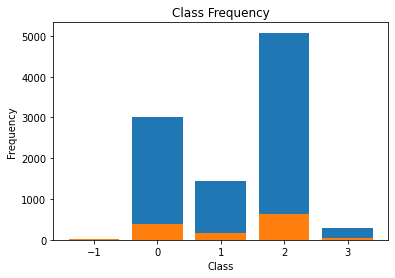

In [44]:
unique, counts = np.unique(length_features['label'], return_counts=True)
plt.bar(unique, counts)
unique, counts = np.unique(pd_dataset_val['label'], return_counts=True)
plt.bar(unique, counts)

plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.show()

####when claim length is zero

In [11]:
pd_dataset[pd_dataset['claim_length']==0]

,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects,claim_length,text_length
1313,Rich Buhler & Staff,,,,,,,-1,,0,0
2479,Rich Buhler & Staff,,,,,,,-1,,0,0
2651,Rich Buhler & Staff,,,,,,,-1,,0,0
5260,Rich Buhler & Staff,,,,,,,-1,,0,0
5490,Rich Buhler & Staff,,,,,,,-1,,0,0
6054,Rich Buhler & Staff,,,,,,,-1,,0,0
6217,Rich Buhler & Staff,,,,,,,-1,,0,0
8507,Rich Buhler & Staff,,,,,,,-1,,0,0


####when main text length is zero

In [12]:
pd_dataset[pd_dataset['text_length']==0]

,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects,claim_length,text_length
1312,39819,A forwarded email that cautions veterans abou...,"March 17, 2015",Veterans can lose their weapons permit if they...,"""",,,-1,,431,0
1313,Rich Buhler & Staff,,,,,,,-1,,0,0
1314,"""",This one is fiction. A spokesperson at the V...,https://www.truthorfiction.com/category/milita...,false,"Military, Warnings",,,-1,,922,0
2152,"""",https://www.politifact.com/truth-o-meter/state...,false,"National, Terrorism, Tom Cotton,",,,,-1,,332,0
2478,39981,A message with what the email says is...,"March 17, 2015",14-year-old boy who had a scary experience wit...,"""",,,-1,,332,0
2479,Rich Buhler & Staff,,,,,,,-1,,0,0
2480,"""",This Dear Abby article was published i...,"https://www.truthorfiction.com/odennell/, http...",unproven,"Food / Drink, Warnings",,,-1,,1418,0
2650,40188,This is a forwarded article that alleges th...,"March 17, 2015",Planned Parenthood Brochures Distributed to Gi...,"""",,,-1,,230,0
2651,Rich Buhler & Staff,,,,,,,-1,,0,0
2652,"""","The eRumor is based on a March 11, 2010 arti...",https://www.reddit.com/submit?url=https%3A%2F%...,false,Miscellaneous,,,-1,,3663,0


####when label is -1

In [13]:
pd_dataset[pd_dataset['label']==-1]

,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects,claim_length,text_length
1312,39819,A forwarded email that cautions veterans abou...,"March 17, 2015",Veterans can lose their weapons permit if they...,"""",,,-1,,431,0
1313,Rich Buhler & Staff,,,,,,,-1,,0,0
1314,"""",This one is fiction. A spokesperson at the V...,https://www.truthorfiction.com/category/milita...,false,"Military, Warnings",,,-1,,922,0
2151,18462,"""In barely four years in office, five jihadist...","April 26, 2013","""Cotton said, """"In barely four years in office...",Louis Jacobson,"""During a House floor speech just days after t...",,-1,,190,7747
2152,"""",https://www.politifact.com/truth-o-meter/state...,false,"National, Terrorism, Tom Cotton,",,,,-1,,332,0
2478,39981,A message with what the email says is...,"March 17, 2015",14-year-old boy who had a scary experience wit...,"""",,,-1,,332,0
2479,Rich Buhler & Staff,,,,,,,-1,,0,0
2480,"""",This Dear Abby article was published i...,"https://www.truthorfiction.com/odennell/, http...",unproven,"Food / Drink, Warnings",,,-1,,1418,0
2650,40188,This is a forwarded article that alleges th...,"March 17, 2015",Planned Parenthood Brochures Distributed to Gi...,"""",,,-1,,230,0
2651,Rich Buhler & Staff,,,,,,,-1,,0,0


In [14]:
len(pd_dataset[pd_dataset['label']==-1])

28

#prepare data

#####filter out rows with -1 label

In [15]:
dataset_nonegative = dataset.filter(lambda example: example['label']!=-1)

  0%|          | 0/10 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [16]:
dataset_nonegative = dataset_nonegative.remove_columns(['claim_id','date_published','explanation','fact_checkers','sources','subjects'])

In [17]:
dataset_nonegative

DatasetDict({
    train: Dataset({
        features: ['claim', 'main_text', 'label'],
        num_rows: 9804
    })
    test: Dataset({
        features: ['claim', 'main_text', 'label'],
        num_rows: 1233
    })
    validation: Dataset({
        features: ['claim', 'main_text', 'label'],
        num_rows: 1214
    })
})

#sbert+bert

**First apply sentence transformer model to select top 5 related sentences from main_text to the claim**

In [ ]:
pip install -U sentence-transformers

In [19]:
from sentence_transformers import SentenceTransformer, util

In [ ]:
sentence_model = SentenceTransformer('msmarco-bert-base-dot-v5')

In [21]:
def add_top(examples):
  list_text = examples['main_text'].split(".")
  qu = sentence_model.encode(examples['claim'], convert_to_tensor=True)
  cor = sentence_model.encode(list_text, convert_to_tensor=True)
  top_5 = util.semantic_search(qu,cor,top_k=5,score_function=util.dot_score)
  top_text = ""
  for e in top_5[0]:
    top_text += list_text[e['corpus_id']].strip() 
    top_text += " "
  top_text = top_text.strip()
  examples['top_text'] = top_text
  return examples

In [ ]:
t = dataset_nonegative.map(add_top)

In [23]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification

In [31]:
from transformers import TrainingArguments, Trainer

In [32]:
from transformers import EarlyStoppingCallback

In [28]:
from transformers import DefaultDataCollator
data_collator = DefaultDataCollator()

In [ ]:
from datasets import load_metric
metric = load_metric("f1")

**Then feed claim and top 5 related sentences as a sentence pair into roberta**

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

In [25]:
def preprocess_function(examples):
  return tokenizer(examples["claim"],examples["top_text"],max_length = 512,truncation=True,padding="max_length")

In [ ]:
tokenized_dataset = t.map(preprocess_function,batched = True)

In [27]:
tokenized_dataset = tokenized_dataset.remove_columns(["main_text"])

**Choose weighted f1 score as metric**

In [30]:
def compute_metrics(eval_pred):
  logits,labels = eval_pred
  predictions = np.argmax(logits,axis=1)
  return metric.compute(predictions=predictions,references=labels,average='weighted')

In [33]:
import torch, gc

gc.collect()
torch.cuda.empty_cache()

In [34]:
default_args = {
    "output_dir": "tmp01",
    "disable_tqdm":False,
    "evaluation_strategy":"steps",
    "eval_steps": 500,
    "learning_rate":2e-5,
    "per_device_eval_batch_size": 8,
    "num_train_epochs": 15,
    "weight_decay":0.01,
    "log_level": "error",
    "report_to": "none",
    "load_best_model_at_end":True,
    "save_strategy":"steps",
    "metric_for_best_model":"f1"
}

**apply early stopping, dropout layer, and fp16 to speed up training process and prevent overfitting**

In [ ]:
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=4,attention_probs_dropout_prob=0.5,
        hidden_dropout_prob=0.2,return_dict=True)

In [36]:
training_args = TrainingArguments(
    save_total_limit = 5,
    per_device_train_batch_size=8,
    #gradient_accumulation_steps=4,
    #gradient_checkpointing=True,
    #fp16=True,
    #optim="adafactor",
    **default_args,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks = [EarlyStoppingCallback(early_stopping_patience=5)]
)

trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Step,Training Loss,Validation Loss,F1
500,0.938000,0.791147,0.642990
1000,0.826000,0.838029,0.636179
1500,0.778700,0.692160,0.664456
2000,0.742700,0.642199,0.699752
2500,0.676300,0.763153,0.700701
3000,0.682300,0.648253,0.696827
3500,0.663800,0.670253,0.734016
4000,0.659500,0.689945,0.716574
4500,0.604000,0.609358,0.743067
5000,0.624200,0.741136,0.684590


TrainOutput(global_step=8500, training_loss=0.6444371876436121, metrics={'train_runtime': 4313.3482, 'train_samples_per_second': 34.094, 'train_steps_per_second': 4.264, 'total_flos': 1.7885558267805696e+16, 'train_loss': 0.6444371876436121, 'epoch': 6.93})

In [37]:
trainer.evaluate()

{'epoch': 6.93,
 'eval_f1': 0.7455829203551881,
 'eval_loss': 0.6579834222793579,
 'eval_runtime': 22.2069,
 'eval_samples_per_second': 54.668,
 'eval_steps_per_second': 6.845}

In [ ]:
model_path = "/content/drive/MyDrive/claim/sbert_roberta"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

**prediction**

In [46]:
predictions = trainer.predict(tokenized_dataset["test"])

In [47]:
preds = np.argmax(predictions.predictions, axis=-1)

In [ ]:
metric_acc = load_metric("accuracy")

In [54]:
metric.compute(predictions=preds, references=predictions.label_ids,average="weighted")

{'f1': 0.7019288379424925}

In [55]:
metric_acc.compute(predictions=preds, references=predictions.label_ids)

{'accuracy': 0.7047850770478508}

**confusion matrix**

In [58]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

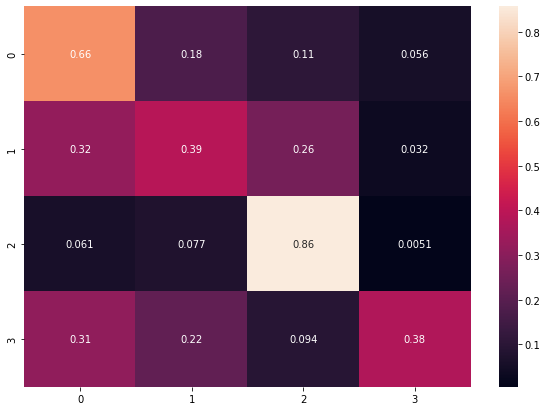

In [59]:
con_m = confusion_matrix(preds, predictions.label_ids,normalize = 'true')
df_cm = pd.DataFrame(con_m, index = list(range(0, 4)), columns= list(range(0, 4)))

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

#Longformer (DO NOT RUN THIS)

In [ ]:
tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/694 [00:00<?, ?B/s]

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["claim"],examples["main_text"],max_length=4096,truncation=True,padding="max_length")

In [ ]:
tokenized_dataset = dataset_nonegative.map(preprocess_function, batched=True)

Loading cached processed dataset at /root/.cache/huggingface/datasets/health_fact/default/1.1.0/99503637e4255bd805f84d57031c18fe4dd88298f00299d56c94fc59ed68ec19/cache-f4199ba6e31699d3.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/health_fact/default/1.1.0/99503637e4255bd805f84d57031c18fe4dd88298f00299d56c94fc59ed68ec19/cache-8c85ece172668336.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/health_fact/default/1.1.0/99503637e4255bd805f84d57031c18fe4dd88298f00299d56c94fc59ed68ec19/cache-324d318579cfef39.arrow


In [ ]:
#tokenized_dataset = tokenized_dataset.remove_columns(["main_text","claim"])
#tokenized_dataset = tokenized_dataset.rename_column("label", "labels")
#tokenized_dataset.set_format("torch")

In [ ]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator()

In [ ]:
from datasets import load_metric

metric = load_metric("accuracy")

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import LongformerForSequenceClassification, TrainingArguments, Trainer

In [ ]:
default_args = {
    "output_dir": "tmp1",
    "disable_tqdm":False,
    "evaluation_strategy":"epoch",
    "learning_rate":2e-5,
    "per_device_eval_batch_size": 1,
    "num_train_epochs": 10,
    "weight_decay":0.01,
    "log_level": "error",
    "report_to": "none",
}

In [ ]:
torch.cuda.empty_cache()

In [ ]:
model = LongformerForSequenceClassification.from_pretrained('allenai/longformer-base-4096', num_labels=4,return_dict=True,gradient_checkpointing=True)

In [ ]:
training_args = TrainingArguments(
    per_device_train_batch_size=1,
    gradient_accumulation_steps=4,
    gradient_checkpointing=True,
    fp16=True,
    #optim="adafactor",
    **default_args,
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

trainer.train()

**It took way too long to fine tune Longformer(30+ hours for 10 epochs)**